<a href="https://colab.research.google.com/github/abhay43/ML_Code/blob/master/DL-%20Convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2020-06-19 03:51:50--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2020-06-19 03:51:50--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc989c3a1702c353e1f3fe6337a0.dl.dropboxusercontent.com/cd/0/inline/A56BwqtQI4dXU-7862tC_eko6u4ikN7W1KCp0lAPVL68BnF0MspBglXqpkBDF6_6-nUjCoPTsEbYVZldQP8eCUck5OOITmk_4uJHo5ljNAnRWRBSCbzZVSE5M0a1wwqkaJU/file# [following]
--2020-06-19 03:51:51--  https://uc989c3a1702c353e1f3fe6337a0.dl.dropboxusercontent.com/cd/0/inline/A56BwqtQI4dXU-7862tC_eko6u4ikN7W1KCp0lAPVL68BnF0MspBglXqpkBDF6_6-nUjCoPTsEbYVZldQP8eCUck5OOITmk_4uJ

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, Dense, Dropout, Activation,Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [7]:
## Setting the hyperperamearters 

train_data_dir=r"/content/training_set/training_set"
test_data_dir=r"/content/test_set/test_set"
epochs= 20
batch_size= 20
img_weight, img_height =250, 250 
nb_train_sample=100
nb_validation_sample =100

In [4]:
#### Data Preprocessing-- 
train_datagen = ImageDataGenerator(zoom_range=0.2,rescale=1./255, horizontal_flip=True, shear_range=0.2 )
test_datagen = ImageDataGenerator(rescale=1./255)



In [9]:
train_data_gen = train_datagen.flow_from_directory(train_data_dir, target_size=(img_weight, img_height), classes=['cats','dogs'], batch_size=batch_size, class_mode='binary')

Found 8005 images belonging to 2 classes.


In [10]:
test_data_gen = train_datagen.flow_from_directory(test_data_dir, target_size=(img_weight, img_height), batch_size=batch_size, class_mode='binary')

Found 2023 images belonging to 2 classes.


In [11]:
## Preprocessing is done. Now applying the CNN


In [14]:
## We need to set the input_shape for the model as it is used in the CNN
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_weight, img_height)
else:
    input_shape=(img_weight,img_height,3)


In [16]:
model_0 = Sequential()
model_0.add(Conv2D(64, (3,3), input_shape= input_shape))

In [18]:
## Adding the relu
model_0.add(Activation('relu'))

##Adding the MaxPooling layer on it
model_0.add(MaxPooling2D(pool_size=(2,2)))



In [21]:
model_0.add(Flatten())

## running the multichanel percepton 
model_0.add(Dense(64))
model_0.add(Activation('relu'))
model_0.add(Dense(1))
model_0.add(Activation('sigmoid'))
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 248, 248, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 248, 248, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 984064)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                62980160  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [22]:
## Compile the model
model_0.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 248, 248, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 248, 248, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 984064)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                62980160  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [26]:
## Fitting the model

training = model_0.fit_generator(train_data_gen,
                  steps_per_epoch=nb_train_sample,epochs=epochs,
                  validation_data=test_data_gen,
                      validation_steps=nb_validation_sample)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 67s 672ms/step - loss: 0.8494 - accuracy: 0.5055 - val_loss: 0.6926 - val_accuracy: 0.4995
Epoch 2/20
100/100 [==============================] - 67s 668ms/step - loss: 0.6935 - accuracy: 0.5185 - val_loss: 0.6876 - val_accuracy: 0.5540
Epoch 3/20
100/100 [==============================] - 67s 668ms/step - loss: 0.6857 - accuracy: 0.5700 - val_loss: 0.6659 - val_accuracy: 0.6100
Epoch 4/20
100/100 [==============================] - 66s 664ms/step - loss: 0.6692 - accuracy: 0.5925 - val_loss: 0.7006 - val_accuracy: 0.5175
Epoch 5/20
100/100 [==============================] - 66s 661ms/step - loss: 0.6540 - accuracy: 0.6265 - val_loss: 0.6330 - val_accuracy: 0.6340
Epoch 6/20
100/100 [==============================] - 67s 666ms/step - loss: 0.6431 - accuracy: 0.6505 - val_loss: 0.6418 - val_accuracy: 0.6385
Epoch 7/20
100/100 [==============================] - 

[[1.]]
Prediction:  Dog


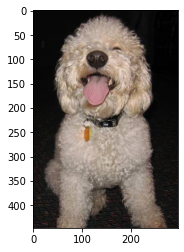

In [30]:
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(250,250))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_0.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


[[1.]]
Prediction:  Dog


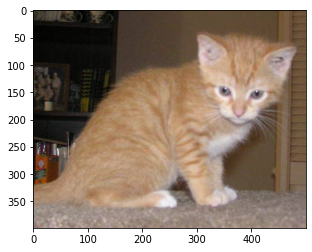

In [33]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(250,250))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_0.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [34]:
## thus the accuracy is very low. We need to optimize the model.  :( 